<a href="https://colab.research.google.com/github/shehanshaman/fyp_short_sem/blob/develop/FYP_sensitivity_and_specificity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
df = pd.read_pickle("drive/My Drive/FYP/dataset/GSE5281/GSE5281_DE_200.plk")
df.head()

Symbol,SST,CHGB,CALY,CHRM1,GOT1,STAT4,NME1,AC004951.6,AX747182,SERTM1,PCSK1,ATP6V1G2,MT1M,GPI,LOC101929787,LOC100272216,MAFF,KIFAP3,MAL2,AMPH,SLC39A12,MTX2,MIR612,NEAT1,ZIC2,PCYOX1L,TAC1,ZNF204P,JPX,MDH1,CCK,PSMB3,NIT2,ATP5B,TMEM200A,ATP6V1B2,DHCR24,SLIRP,VSNL1,MGC12488,...,TM9SF2,CCNH,SLC12A7,APLNR,MAP2K1,SLC35B1,CACNA2D3,PCDH8,GLRB,NEFL,YAP1,NRSN1,SLC9A6,CAPNS1,ALAS1,FIG4,PSENEN,GFAP,IMMT,SUCLA2,FHL2,AK090844,RAB33A,ZCCHC24,PPEF1,MLLT11,RGS4,SLC16A14,SNCA,PRR34-AS1,RGS7,NRXN3,NAA20,UCHL3,HACL1,ATP6V0B,ATP1A1,SLITRK4,MAP7D2,class
GSM119615,8.131880,8.038977,5.151241,5.960189,6.496582,5.177266,6.735126,4.923159,4.923159,5.585295,5.573235,8.434417,3.951437,6.968975,5.885994,6.083629,4.681431,6.380428,8.110305,8.915695,6.329852,7.560527,5.166372,5.166372,5.868591,6.328347,8.347192,7.275703,2.934900,10.763783,9.171231,6.893028,6.257113,8.455516,7.526488,8.284930,6.960068,7.639021,10.283798,4.911598,...,6.481914,7.011247,6.635072,4.528372,8.128725,5.278402,7.828262,9.860453,6.917989,9.267750,4.186140,8.675869,9.841581,6.251841,5.816591,7.935832,4.435020,7.054613,7.414872,7.961066,5.799641,5.298147,5.783877,7.456909,3.927690,10.847098,7.307455,8.620085,7.958731,6.325037,6.384926,7.623302,7.276087,5.246386,4.698036,6.566670,8.079477,7.012174,8.392132,0
GSM119616,9.505370,6.843639,5.565685,8.256848,6.808876,5.937782,7.084662,4.308553,4.308553,5.424460,4.320161,8.430603,4.281796,8.000928,5.867583,5.881952,4.849331,4.707004,6.259058,8.320264,3.686194,6.720044,4.380328,4.380328,4.223862,7.514385,5.181012,6.709932,2.920651,9.269761,7.808680,8.121838,6.331245,8.937122,8.268992,7.795785,7.118234,8.470085,9.097778,4.862214,...,5.992824,6.292830,6.375591,5.458683,7.259421,6.062100,7.621714,8.018103,6.181431,8.943403,3.566653,7.639978,9.082520,7.135552,6.144733,9.000454,4.363489,7.491630,6.946851,7.412511,6.767040,5.279988,6.146401,7.418142,5.079694,11.668155,7.324564,7.498362,7.426317,6.648298,6.447447,6.868568,6.718846,4.696639,5.302263,6.957373,8.561748,6.600915,8.290398,0
GSM119617,5.369160,4.665645,4.252331,6.834361,4.808397,4.486761,5.409682,5.665046,5.665046,3.364531,3.173762,5.653338,5.513703,6.178967,4.493120,6.389841,4.266874,3.454873,3.314502,5.044705,3.599311,4.476322,4.598128,4.598128,4.741784,5.884224,2.750926,4.544694,2.957573,6.592042,5.094963,5.935664,3.925424,7.702212,4.875246,5.456936,4.877980,6.446468,6.502673,5.294911,...,4.393931,4.383398,6.730196,5.016607,5.234606,4.735439,4.595901,4.923356,4.103622,5.937121,3.534403,6.366537,6.387074,6.485473,4.318861,8.097815,3.472717,7.186470,5.193497,4.871446,5.890325,6.716955,4.677529,7.630651,3.765344,9.503726,5.363508,4.069276,5.191100,6.747926,5.840032,5.171308,4.926782,3.523475,3.793645,5.613994,6.183599,3.677790,6.366832,0
GSM119618,5.999060,5.293017,5.245800,7.863578,4.886358,4.517919,4.878878,5.699413,5.699413,3.256316,3.239969,6.032224,5.696868,6.902142,4.852395,6.174321,4.890228,3.162665,3.420588,6.075690,3.675883,5.037034,4.777270,4.777270,4.456430,6.072395,3.954933,4.304102,3.929218,6.965705,5.701809,6.574085,4.373662,7.954236,4.715554,5.423112,5.092454,6.445284,7.277838,5.940631,...,4.946065,4.509396,6.818696,5.455425,4.170590,4.704986,4.562267,5.021351,4.262546,6.659974,3.333360,6.384433,7.335424,6.555934,4.342724,8.521468,3.992268,7.553568,5.467763,4.919411,5.698300,6.608849,5.180804,7.807734,3.603359,10.139533,5.626352,4.978548,6.106691,7.378966,5.936174,5.411828,5.461794,3.848761,4.159845,6.010982,6.505356,4.053398,7.139060,0
GSM119619,9.820469,9.230820,6.719501,7.177746,7.966393,6.153760,8.338353,3.590518,3.590518,6.930045,6.690597,8.947760,4.743912,8.350846,5.228459,6.785353,5.220601,7.127253,9.211837,9.256675,5.360266,7.971362,4.845992,4.845992,4.778356,6.846255,9.312080,7.200142,3.003917,11.759778,9.423194,7.365393,7.489957,9.778586,8.368750,10.092938,8.010270,8.065691,10.858154,4.673697,...,8.024168,7.967964,5.854620,4.936726,8.956529,6.474409,8.466506,9.983657,7.696830,10.167188,4.075549,8.777251,9.862478,7.814851,7.751669,8.701667,5.069903,6.793184,7.869865,8

In [ ]:
y = df["class"] 
X = df.drop("class",1)

In [ ]:
pca_col = ['STAT4', 'AMPH', 'ZIC2', 'TAC1', 'TMEM200A', 'SLIRP', 'SLC39A10', 'SPHKAP', 'CALB1', 'CDK7', 'AP2M1', 'PLK2', 'P2RY14', 'EMX2', 'SERPINF1', 'ARPC1A', 'PVALB', 'LOC101060510', 'VAMP7', 'LSM7', 'ATP1A3', 'PCP4', 'EXOC8', 'RIT2', 'BCAS1', 'PSMB4', 'LAMP5', 'PCDH8', 'NRSN1', 'CAPNS1', 'ALAS1', 'RAB33A', 'SLC16A14', 'HACL1']
rf_col = ['SLC12A7', 'CKMT1B', 'ATP6V1E1', 'ATP5B', 'LOC100272216', 'REEP1', 'CHRM1', 'COPG2IT1', 'TUBB3', 'PSMB3', 'MIF', 'CDK5', 'IMMT', 'PSMA5', 'PLSCR4', 'LRP4', 'BSCL2', 'ATP5C1']
fi_col = ['TARBP1', 'C2orf80', 'CCNH', 'RNF175', 'EPDR1', 'FAM107B', 'FPGT-TNNI3K', 'DHCR24', 'GLRB', 'TUBA4A', 'HMP19', 'SERPINI1', 'NRXN3', 'SUCLA2', 'SDR16C5', 'C12orf10', 'GRAMD3', 'RPH3A']
all_found = ['AC004951.6','MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2' ,'RP11-271C24.3', 'PRO1804' ,'PRR34-AS1']

In [ ]:
final_pca_col = ['SST', 'CHGB', 'MT1M', 'SLC39A12', 'JPX', 'CTD-3092A11.2', 'RP11-271C24.3', 'APLNR', 'PPEF1']

In [ ]:
dis_gene = list(all_found + final_pca_col)
dis_gene_unique = list(dict.fromkeys(all_found + final_pca_col))

Accuracies

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def printTop3ClassificationResults(X_train, X_test, y_train, y_test): 
  
  m = getTop3ClassificationResults(X_train, X_test, y_train, y_test)

  print("\t\t\t\t\t\t Testing\t Training")
  print("SVM + Gaussian kernel model accuracy(in %) \t:" , m[0][0] ,"\t", m[0][1])
  print("SVM + linear kerne model accuracy(in %) \t:" , m[1][0] ,"\t", m[1][1])
  print("Random forest model accuracy(in %) \t\t:" , m[2][0] ,"\t", m[2][1])


def getTop3ClassificationResults(X_train, X_test, y_train, y_test):
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)
  
  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)

  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)

  m = np.array([[round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) , round(score_svm_rbf.mean()*100,2)], 
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) , round(score_svm_li.mean()*100,2)],
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) , round(score_svm_li.mean()*100,2)]])
  
  return m

In [ ]:
def print_sensitivity_specificity(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  print(cm)
  print("Sensitivity: \t", round(cm[0][0]/(cm[0][0] + cm[1][0]),3))
  print("Specificity: \t", round(cm[1][1]/(cm[1][1] + cm[0][1]),3))

In [ ]:
def print_all_model_confusion_matrix(diff_df, y):
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  svm_li_clf.fit(diff_df, y)
  y_pred_svm_li = svm_li_clf.predict(diff_df)
  print("Linear Kernel")
  print_sensitivity_specificity(y, y_pred_svm_li)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  svm_rbf_clf.fit(diff_df, y)
  y_pred_svm_rbf = svm_rbf_clf.predict(diff_df)
  print("\nGaussian kernel")
  print_sensitivity_specificity(y, y_pred_svm_rbf)

  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  RF_clf.fit(diff_df, y)
  y_pred_RF = RF_clf.predict(diff_df)
  print("\nRandom forest")
  print_sensitivity_specificity(y, y_pred_RF)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def getROC(X_train, X_test, y_train, y_test):

  classifier_SVM_li = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                  random_state=42))
  classifier_SVM_gu = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                  random_state=42))
  classifier_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)

  y_score_SVM_li = classifier_SVM_li.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_gu = classifier_SVM_gu.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_RF = classifier_RF.fit(X_train, y_train)

  fpr_li, tpr_li, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_li.ravel())
  fpr_gu, tpr_gu, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_gu.ravel())

  roc_auc_li = auc(fpr_li, tpr_li)
  roc_auc_gu = auc(fpr_gu, tpr_gu)

  y_pred_proba_RF = classifier_RF.predict_proba(X_test)[::,1]
  fpr_RF, tpr_RF, _ = metrics.roc_curve(np.int64(y_test.values),  y_pred_proba_RF)
  roc_auc_RF = metrics.roc_auc_score(np.int64(y_test.values), y_pred_proba_RF)

  plt.plot(fpr_li,tpr_li,label="SVM linear, auc="+str(round(roc_auc_li,2)))
  plt.plot(fpr_gu,tpr_gu,label="SVM gaussian, auc="+str(round(roc_auc_gu,2)))
  plt.plot(fpr_RF,tpr_RF,label="Random forest, auc="+str(round(roc_auc_RF,2)))

  plt.ylabel("Sensitivity")
  plt.xlabel("1 - Specificity")

  plt.legend(loc="lower right")

9 Genes | PCA

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 93.88 	 84.8
SVM + linear kerne model accuracy(in %) 	: 93.88 	 85.63
Random forest model accuracy(in %) 		: 91.84 	 85.63


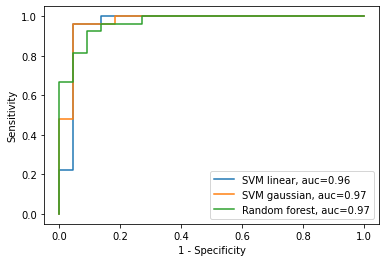

In [ ]:
diff_df = df[final_pca_col]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test)

getROC(X_train, X_test, y_train, y_test)

In [ ]:
#sensitivity and specificity
print_all_model_confusion_matrix(diff_df, y)

Linear Kernel
[[71  3]
 [ 1 86]]
Sensitivity: 	 0.986
Specificity: 	 0.966

Gaussian kernel
[[72  2]
 [ 1 86]]
Sensitivity: 	 0.986
Specificity: 	 0.977

Random forest
[[71  3]
 [ 3 84]]
Sensitivity: 	 0.959
Specificity: 	 0.966


14 Genes | ALL

In [ ]:
len(dis_gene_unique)

14

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 93.88 	 89.24
SVM + linear kerne model accuracy(in %) 	: 93.88 	 89.24
Random forest model accuracy(in %) 		: 91.84 	 89.24


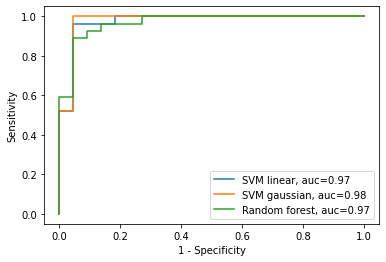

In [ ]:
diff_df = df[dis_gene_unique]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test)

getROC(X_train, X_test, y_train, y_test)

In [ ]:
#sensitivity and specificity
print_all_model_confusion_matrix(diff_df, y)

Linear Kernel
[[71  3]
 [ 2 85]]
Sensitivity: 	 0.973
Specificity: 	 0.966

Gaussian kernel
[[72  2]
 [ 1 86]]
Sensitivity: 	 0.986
Specificity: 	 0.977

Random forest
[[69  5]
 [ 3 84]]
Sensitivity: 	 0.958
Specificity: 	 0.944


17 Genes | ALL

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 97.96 	 92.82
SVM + linear kerne model accuracy(in %) 	: 93.88 	 91.04
Random forest model accuracy(in %) 		: 91.84 	 91.04


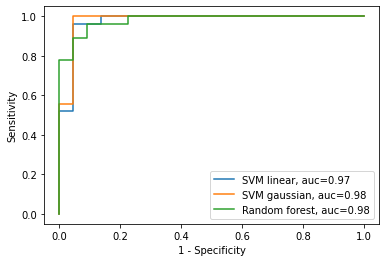

In [ ]:
diff_df = df[dis_gene]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test)

getROC(X_train, X_test, y_train, y_test)

In [ ]:
#sensitivity and specificity
print_all_model_confusion_matrix(diff_df, y)

Linear Kernel
[[71  3]
 [ 1 86]]
Sensitivity: 	 0.986
Specificity: 	 0.966

Gaussian kernel
[[72  2]
 [ 1 86]]
Sensitivity: 	 0.986
Specificity: 	 0.977

Random forest
[[71  3]
 [ 3 84]]
Sensitivity: 	 0.959
Specificity: 	 0.966
